# Basic Prep and Models
This notebook is designed to show the shortest path from opening a file to getting a model, it will serve as a baseline for the 02 Notebook that goes into advanced data prep but then uses the same modelling code to consume the data.

The notebook was tested on Windows 10 with Python 3.7

## Imports
There are 3 classes of imports here all of these should be part of a standard Condas install of python.

In [33]:
import pandas as pd
import warnings
from collections import OrderedDict
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Sampling
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## Rectangulisation - Reading the file
This can be a very iterative experience, it is usually helpful to have some form of raw file reader like Notepad++ available to help determine the properties of the file, that combined with hit and miss gets the right properties to provide a rectangle. We need a rectangle because thats what most of the data manipulation tools need.

Verification of action is critical before moving on, in this case a simple head is what we are going to use.

"CSV is the worst form of transparent, tool agnostic file format, except for all the others"
- Jenny Bryan

In [34]:
titanic_df = pd.read_csv('Titanic_Basic_Delim_Fixed.csv', delimiter = "|")
titanic_df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Develop understanding of the data
In this case a simple shape helps us understand the row and col counts so we know the params of what we have to do with the data.

In [35]:
titanic_df.shape

(1310, 14)

## Drop bad rows and columns
As this is a simple example our data prep is just going to consist of getting rid of bad data rather than trying to fix it, having explored this data set many times we know where the problems lie.

In [36]:
titanic_df2 = titanic_df.drop(['boat', 'home.dest', 'body','ticket', 'embarked', 'sex', 'name', 'cabin'],axis=1)
titanic_df2 = titanic_df2.dropna()
titanic_df2.head(5)

## Start Modelling
We know our goal, predict survival set up 2 dataframes one with only the target feature and the other all the columns that are left minus the target feature.

In [37]:
target_df = titanic_df2['survived']
features_df = titanic_df2.drop(['survived'],axis=1)

Split the data into a test and train set and then run each of the algorithms in turn to build a model

In [38]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state=42)

##############################################################################
# Logistic Regression  
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = lr.score(X_test, y_test)

##############################################################################
# Create a random Forest Classifier instance
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_accuracy = rfc.score(X_test, y_test) # = accuracy

##############################################################################
#Decision Tree
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train,  y_train)
y_pred = dtree.predict(X_test)
dtree_accuracy = dtree.score(X_test,  y_test) 
    
#############################################################################    
#Support Vector Machine
suppvc = SVC(gamma = 0.001)
suppvc.fit(X_train, y_train)
y_pred = suppvc.predict(X_test)
suppvc_accuracy = suppvc.score(X_test, y_test) 



Logistic Regression: 0.65
Random Forest: 0.63
Decision Tree: 0.56
Support Vector Machine: 0.66


In [ ]:
print("Logistic Regression: " + str(round(lr_accuracy, 2)))
print("Random Forest: " + str(round(rfc_accuracy,2)))
print("Decision Tree: " + str(round(dtree_accuracy,2)))
print("Support Vector Machine: " + str(round(suppvc_accuracy,2)))

### Feature Importance
As part of validating the data prep we need to look at the output of the model, in this case which features are important to some of the models and which to others. This is an iterative process, after reviewing these results we might go back and make changes to the data, we might provide different data sets for different algorithms.

In this case there may be a problem with multicolinearity between 2 of the features, this could cause problems for regression driven models and it may be the right thing to drop one of these. In addition the integer ranges in some of the columns use different scales (age vs fare) this can cause problems for Support Vector Machines and would potentially need some scaling work done.

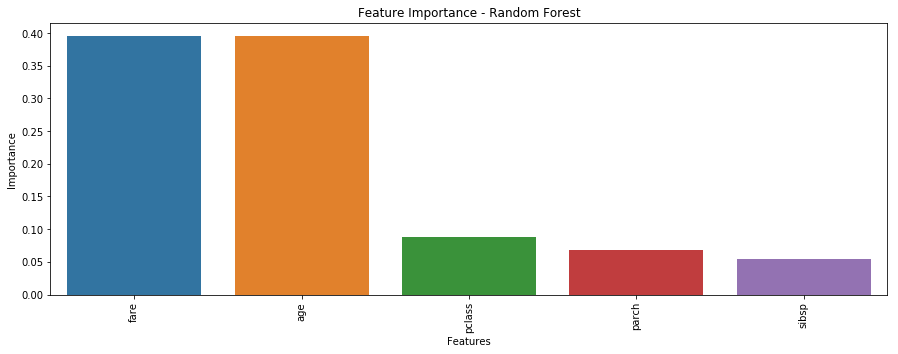

In [39]:
features = features_df.columns.tolist()
fi = rfc.feature_importances_
sorted_features = {}
for feature, imp in zip(features, fi):
    sorted_features[feature] = round(imp,3)

# sort the dictionnary by value
sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key=lambda t: t[1]))
dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features', 'Importance'])
plt.figure(figsize=(15, 5))
plt.title('Feature Importance - Random Forest')
sns.barplot(x='Features', y='Importance', data=dfvi);
plt.xticks(rotation=90) 
plt.show()

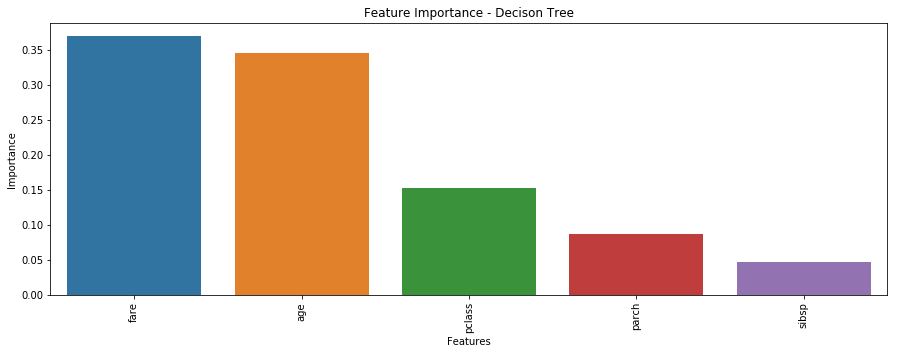

In [40]:
features = features_df.columns.tolist()
fi = dtree.feature_importances_
sorted_features = {}
for feature, imp in zip(features, fi):
    sorted_features[feature] = round(imp,3)

# sort the dictionnary by value
sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key=lambda t: t[1]))

dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features', 'Importance'])
plt.figure(figsize=(15, 5))
plt.title('Feature Importance - Decison Tree')
sns.barplot(x='Features', y='Importance', data=dfvi);
plt.xticks(rotation=90) 
plt.show()